**SOBRE O DATASET**  
Este conjunto de dados fornece metadados detalhados e análise de áudio para uma ampla coleção de faixas musicais do Spotify em diversos gêneros. Inclui informações sobre cada faixa, como popularidade, andamento, energia, dançabilidade e outros recursos musicais que podem ser usados para sistemas de recomendação de músicas, classificação de gêneros ou análise de tendências. O conjunto de dados é uma fonte rica para explorar padrões de consumo musical e preferências do usuário com base nas características das músicas.

**Detalhes do conjunto de dados**  
Este conjunto de dados contém linhas de faixas musicais individuais, cada uma descrita por metadados (como nome da faixa, artista, álbum e gênero) e características quantitativas de áudio. Essas características refletem diferentes atributos musicais, como energia, acústica, instrumentalidade, valência e outros, tornando-o ideal para projetos de aprendizado de máquina de áudio e análise exploratória de dados.

**Descrições de esquemas e colunas**

| Nome da variável | Descrição |
| - | - |
| **index** | Índice único para cada faixa (pode ser ignorado na análise) |
| **track\_id** | Identificador único da faixa no Spotify |
| **artists** | Nome do(s) artista(s) que performa(m) |
| **album\_name** | Título do álbum ao qual a faixa pertence |
| **track\_name** | Título da faixa |
| **popularity** | Índice de popularidade no Spotify (escala de 0 a 100) |
| **duration\_ms** | Duração da faixa em milissegundos |
| **explicit** | Indica se a faixa contém conteúdo explícito |
| **danceability** | Grau de adequação da faixa para dança (0,0 a 1,0) |
| **energy** | Nível de intensidade e atividade da faixa (0,0 a 1,0) |
| **key** | Tom musical (0 = Dó, 1 = Dó♯/Ré♭, …, 11 = Si) |
| **loudness** | Volume geral da faixa em decibéis (dB) |
| **mode** | Modalidade (1 = maior, 0 = menor) |
| **speechiness** | Presença de elementos falados na faixa (0,0 a 1,0) |
| **acousticness** | Probabilidade de a faixa ser acústica (0,0 a 1,0) |
| **instrumentalness** | Probabilidade de a faixa não conter vocais (0,0 a 1,0) |
| **liveness** | Presença de público na gravação (0,0 a 1,0) |
| **valence** | Positividade musical transmitida (0,0 = triste, 1,0 = feliz) |
| **tempo** | Estimativa de andamento em batidas por minuto (BPM) |
| **time\_signature** | Assinatura de tempo da faixa (por exemplo, 4 = 4/4) |
| **track\_genre** | Gênero atribuído à faixa |

**Texto adaptado da publicação original do publicador do dataset no [Kaggle](https://www.kaggle.com/datasets/melissamonfared/spotify-tracks-attributes-and-popularity/data).

# PREPARATION, ORGANIZATION, AND STRUCTURING OF DATA

1\) Getting to Know the Dataset  
Inicialmente, podemos verificar o conjunto de dados.

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data_analytics/dataset.csv')

df.head()

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.shape

(114000, 21)

2\) Optimization

In [5]:
df.info(max_cols=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Columns: 21 entries, index to track_genre
dtypes: bool(1), float64(9), int64(6), object(5)
memory usage: 17.5+ MB


In [6]:
# selecting numeric columns by type
cols_float = df.select_dtypes(include='float64').columns
cols_int = df.select_dtypes(include='int64').columns

In [7]:
# applying downcast to float and int columns
df[cols_float] = df[cols_float].apply(pd.to_numeric, downcast='float')
df[cols_int] = df[cols_int].apply(pd.to_numeric, downcast='integer')

df.info(max_cols=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Columns: 21 entries, index to track_genre
dtypes: bool(1), float32(9), int32(2), int8(4), object(5)
memory usage: 9.7+ MB


3\) Null Values

In [8]:
df.isna().sum()

,0
index,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [9]:
df[df.isna().any(axis=1)]

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391006,4,k-pop


In [10]:
df_clean = df.copy()

In [11]:
df_clean.dropna(inplace=True)

In [12]:
df_clean.shape

(113999, 21)

4\) Variável redundante

In [13]:
df_clean.drop('index', axis=1, inplace=True)

5\) Valores duplicados

In [14]:
def feature_select(df, features):
    if len(features) == 1:
        feature_diference = [i for i in df.columns if i != features]
    else:
        feature_diference = [i for i in df.columns if i not in features]

    return feature_diference

In [15]:
features = feature_select(df_clean, 'track_genre')

In [16]:
df_clean.drop_duplicates(subset=features, keep='first', inplace=True)

In [17]:
df_clean.shape

(90460, 20)

In [18]:
df_clean[df_clean.track_name == 'Ya No Tiene Novio']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
88344,1uKcGwRRnPUrCPOoNt4Od2,Sebastian Yatra;Mau y Ricky,Perreo Tenebroso Vol. 5,Ya No Tiene Novio,0,198933,False,0.632,0.832,7,-1.948,0,0.156,0.048,0.0,0.0705,0.783,182.192993,4,reggae
88347,1rbsgmmZ7M2aXkM6h0LK38,Sebastian Yatra;Mau y Ricky,Noche de Halloween Latino,Ya No Tiene Novio,3,198933,False,0.632,0.832,7,-1.948,0,0.156,0.048,0.0,0.0705,0.783,182.192993,4,reggae
88348,0ZIq8sPbcDqIdlKf24VJ2q,Sebastian Yatra;Mau y Ricky,Reggeaton Imperdible,Ya No Tiene Novio,5,198933,False,0.632,0.832,7,-1.948,0,0.156,0.048,0.0,0.0705,0.783,182.192993,4,reggae


In [19]:
features = feature_select(df_clean, ['track_id', 'album_name', 'popularity'])

In [20]:
df_clean.drop_duplicates(subset=features, keep='first', inplace=True)

In [21]:
df_clean.shape

(84823, 20)

# CORRELATION
Basicamente, mede força, direção e significância estatística do relacionamento entre duas variáveis quantitativas.  
1\) Feature Engineering

In [22]:
# duration_ms (milissegundos) para segundos
df_clean['duration_s'] = df_clean.duration_ms / 1000
df_clean['explicit'] = df_clean.explicit.astype('int8')

df_clean.drop(['duration_ms'], axis=1, inplace=True)

In [23]:
df_clean.head(1)

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_s
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,0,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic,230.666


## Guidelines
Alguns critérios precisam ser atendidos para utilizar Correlação Linear de Pearson. Caso os mesmos não sejam atendidos, um teste não-paramétrico deve ser utilizado.

1\. Measurement scale  
As variáveis devem ser medidas em uma escala intervalar ou de razão.  

In [24]:
df_clean.dtypes

,0
track_id,object
artists,object
album_name,object
track_name,object
popularity,int8
explicit,int8
danceability,float32
energy,float32
key,int8
loudness,float32


1\) Label encoding  
Técnica utilizada para converter variáveis categóricas em numéricas.

In [25]:
df_corr = df_clean.copy().select_dtypes(include=['number'])

In [26]:
df_corr.drop_duplicates(inplace=True)

df_corr.shape

(84757, 15)

<br></br>
2\. Functional independence  
É necessário que determinada variável não seja calculada diretamente a partir de outra. Conhecendo a natureza dos dados, concluimos que as variáveis são independentes.

3\. Relationship between the variables  
As variáveis devem possuir relação linear.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Setting a light background theme
sns.set_theme(style='whitegrid')

plt.rcParams.update(
    {
        'text.color': 'gray',             # text color
        'axes.labelcolor': 'gray',        # axis label color
        'axes.edgecolor': 'gray',         # axis border color
        'xtick.color': 'gray',            # x-axis tick color
        'ytick.color': 'gray',            # y-axis tick color
        'axes.titlecolor': 'gray',        # axis title color
        'axes.edgecolor': 'lightgray',    # axis border color
        'axes.facecolor': 'white',        # axis background color
        'figure.facecolor': 'white',      # figure background color
        'figure.edgecolor': 'white'
        }
    )

In [29]:
import math

In [30]:
features = feature_select(df_corr, 'valence')

In [31]:
n = len(features)
n_cols = 4

In [32]:
n_rows = math.ceil(n / n_cols)

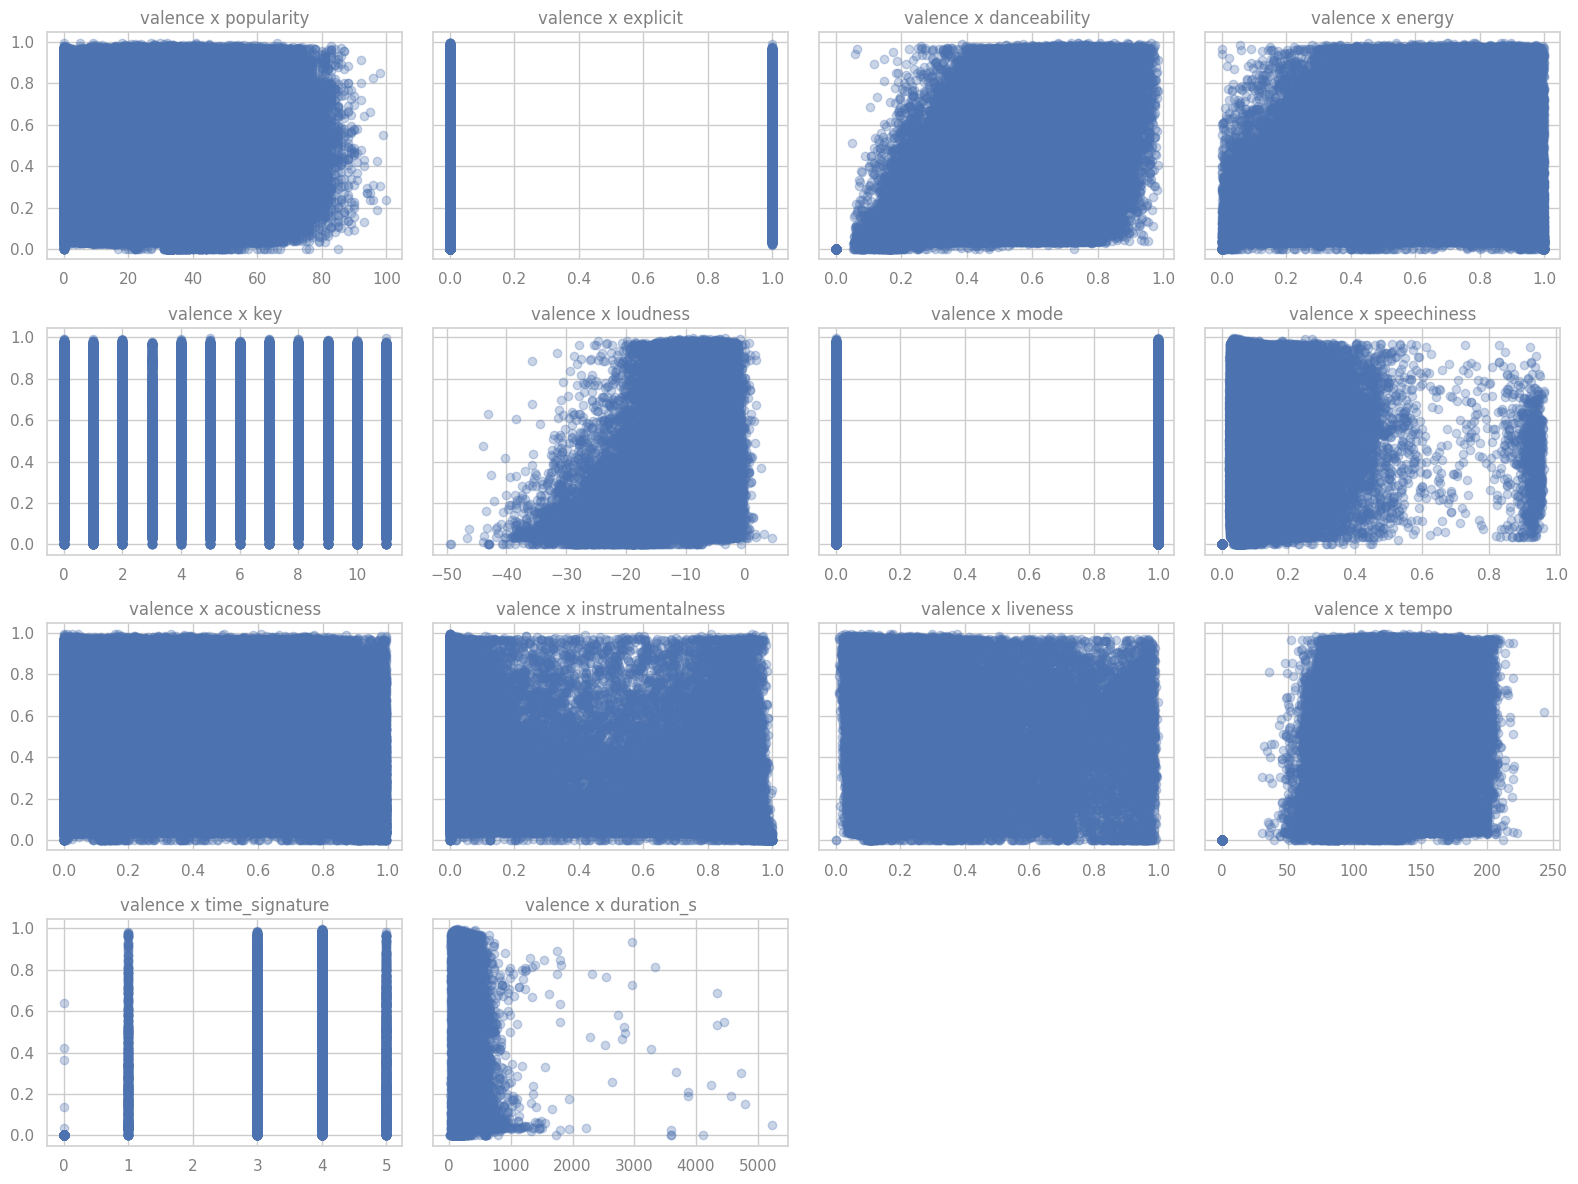

In [33]:
# 1. Adicione sharey=True aqui
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows),
                                         squeeze=False, sharey=True)

for idx, var in enumerate(features):
    r = idx // n_cols
    c = idx % n_cols
    ax = axes[r][c]
    ax.scatter(df_corr[var], df_corr['valence'], alpha=0.3)
    ax.set_xlabel('')
    ax.set_title(f'valence x {var}')

# desliga eixos que sobram
for empty_ax in axes.flatten()[n:]:
    empty_ax.axis('off')

# O tight_layout ajustará o espaçamento para que o ylabel não se sobreponha
plt.tight_layout();

Interpretação:
1. Tendência positiva aparente
  - **Danceability**: à medida que valence aumenta, há um leve "empurrão" para valores maiores de danceability — embora com bastante dispersão em toda a faixa;
  - **Energy**: percebe-se um gradiente mais claro: faixas mais "felizes" tendem a ser energeticamente mais intensas (mais próximas de 1.0);
  - **Loudness**: existe uma nítida inclinação de baixo para alto, ou seja, músicas mais altas (menos negativas em dB) costumam ter valence maior;
  - **Tempo**: também há um leve viés de incremento no BPM conforme aumenta a positividade.
2. Relações fracas ou inconsistentes
  - **Popularity**: o "nuvem" está muito espalhado, sem indicar subida ou descida clara de valence conforme muda o índice de popularidade;
  - **Acousticness e Instrumentalness**: nenhum viés linear: faixas acústicas/instrumentais podem aparecer tanto em valence baixa quanto alta;
  - **Speechiness, Liveness e Duration**: idem — dados muito dispersos, sem reta que represente bem o conjunto.
3. Variáveis categóricas que geram "clusters"
  - Em mode, por exemplo, dá para notar que "maiores" (1) têm valence levemente mais elevado em média do que "menores" (0);
  - Em key e time_signature, não há um gradiente visível de valence conforme sobe o número; são mesmo categorias isoladas.

Como algumas variáveis se mostraram com relação aproximadamente lienar, continuaremos com os testes.

<br></br>
4\. Normality  
As distribuições das variáveis devem ser normais (ou aproximadamente).

1\) QQ-Plot  
Se os pontos se alinharem aproximadamente ao longo da linha reta no gráfico, a variável pode ser considerada normalmente distribuída.

In [34]:
from scipy import stats


def qq_subplots(df):
    # determine the number of rows
    nrows = (len(df.columns) + 1) // 2 # round up for odd numbers

    # create the subplots
    fig, ax = plt.subplots(nrows, 2, figsize=(12, nrows * 4))

    # flatten the axes for easy iteration
    ax = ax.flatten()

    # QQ-plot graphs
    for i, j in enumerate(df.columns):
        stats.probplot(df[j], dist='norm', plot=ax[i])
        ax[i].set_title(f'{j} QQ-plot')

    # remove possible "empty" subplots
    for i in range(len(df.columns), len(ax)):
        fig.delaxes(ax[i])

    return plt.tight_layout()

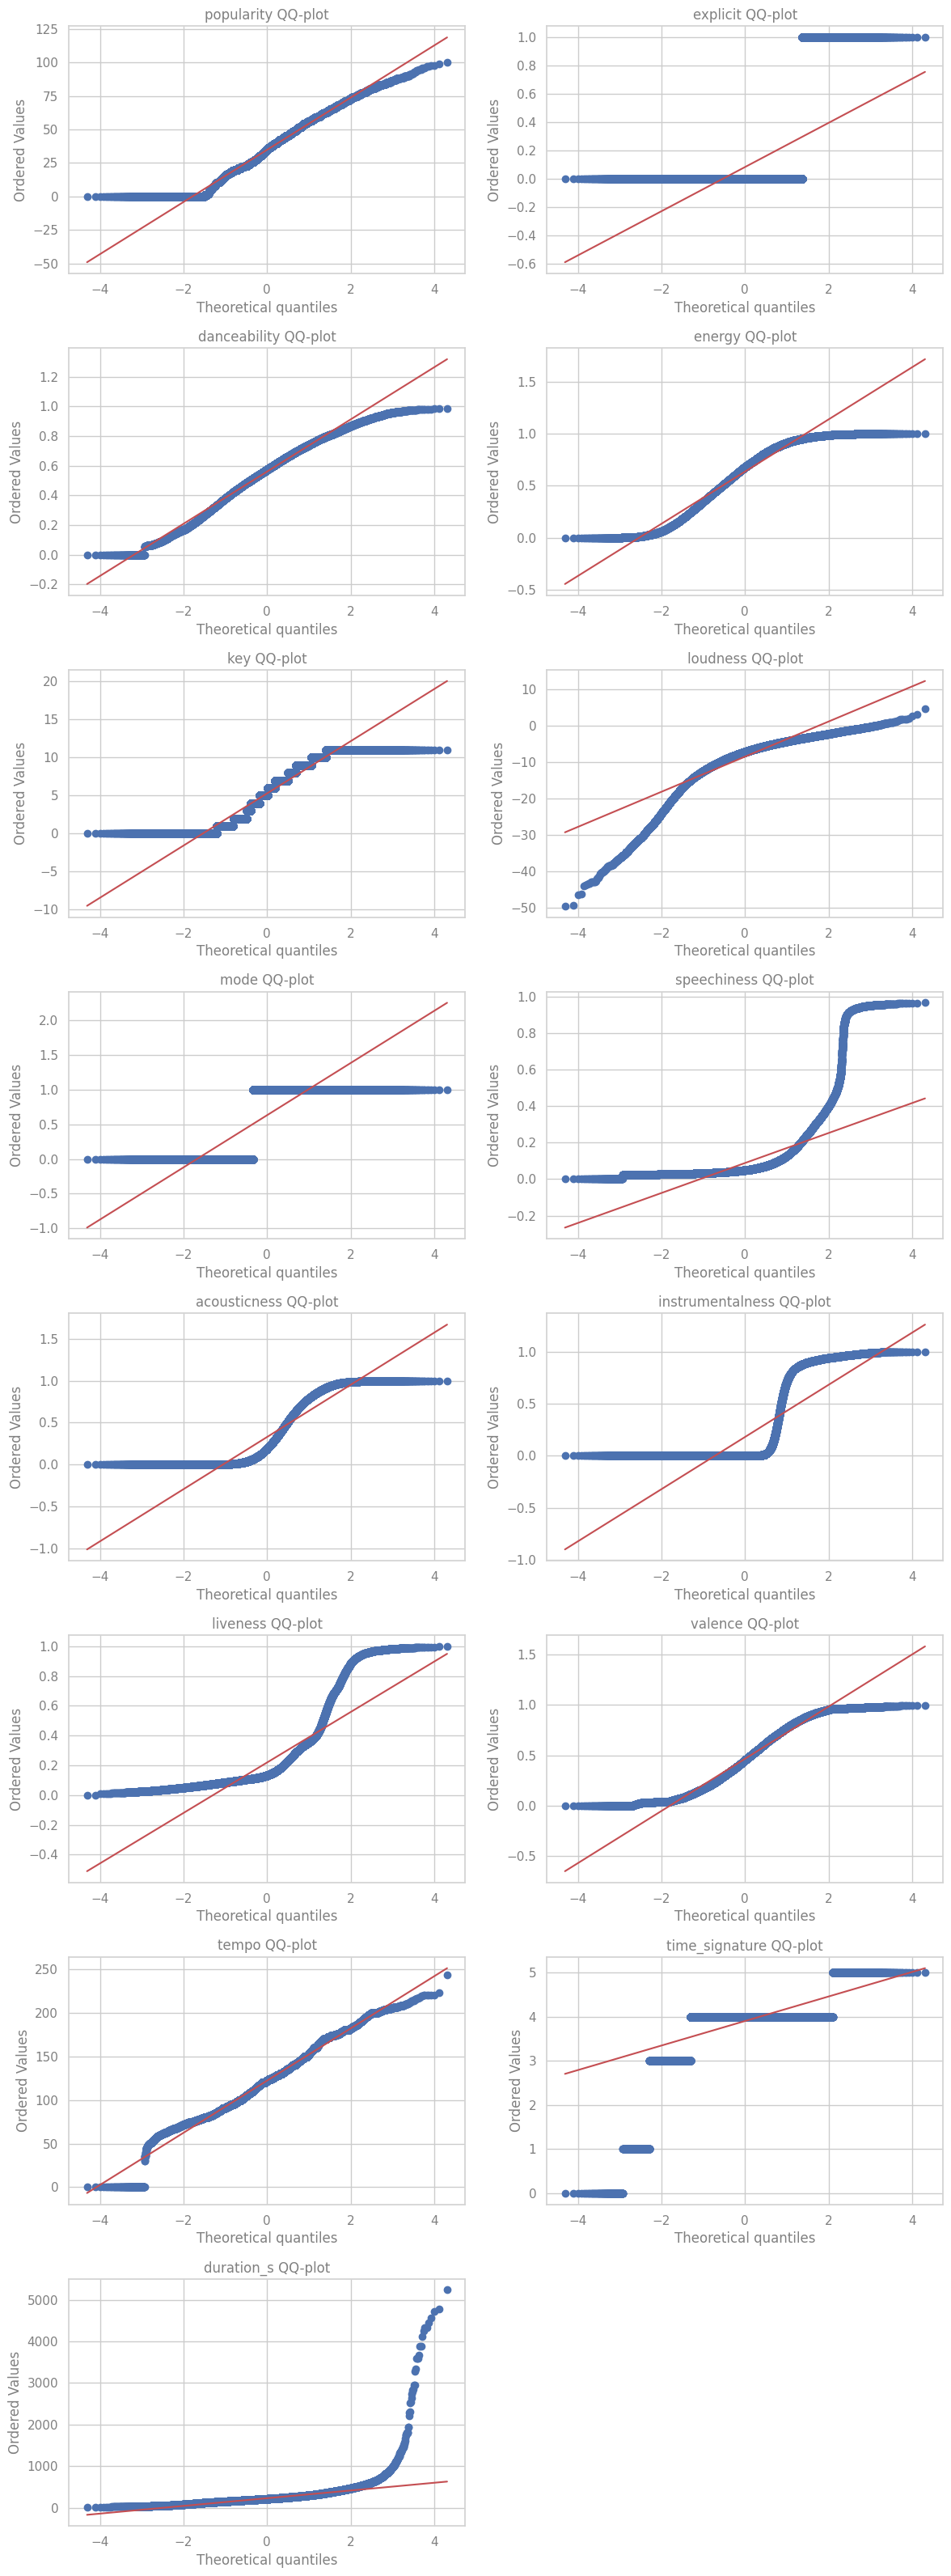

In [35]:
qq_subplots(df_corr)

Interpretação:

| Variável | Ajuste ao Q-Q plot | Conclusão |
| - | - | - |
| **danceability** | Pontos quase sobre a reta nos quantis centrais, com curvatura leve nas extremidades. | **Aproximação razoável** |
| **energy** | Comportamento muito parecido ao da valence: S-shaped suave, sem caudas extremas fortes. | **Aproximação razoável** |
| **valence** | S-shaped também discreto, boa aderência no centro, caudas moderadas. | **Aproximação razoável** |
| **tempo** | Dentro de 50-200 BPM segue reta bem, mas tem "aglomerados" nos extremos (0 e >200). | **Quase normal**, mas atenção às caudas. |
| **loudness** | Forte distorção na cauda esquerda (muitas músicas muito baixas), só linear no meio.     | **Não normal**                              |
| **popularity** | Muito achatado até o 25º percentil e apenas linear a partir da mediana. | **Não normal** |
| **duration\_s** | Distribuição com cauda direita longa (algumas faixas muito longas). | **Não normal** |
| **speechiness, acousticness, instrumentalness, liveness** | Curvas em "S" muito acentuado, quase degrau (muitas 0's e muitos 1's). | **Não normal** |
| **key, mode, time\_signature** | Pontos em colunas discretas — sem continuidade. | **Categóricas** (não se avalia normalidade) |

Dado os resultados, vamos prosseguir com testes numéricos para verificar a hipótese.

<br></br>
2\) Testes Numéricos  
Critério:
- **Nível de significância (α)**: 0.05;

Hipóteses:
- **H<sub>0</sub>**: A variável segue uma distribuição normal;
- **H<sub>1</sub>**: A variável não segue uma distribuição normal.

In [36]:
from statsmodels.stats.diagnostic import lilliefors

In [37]:
def normality_tests(df, cols=None):
    if isinstance(cols, str):
        cols = [cols]
    elif cols is None:
        cols = df.select_dtypes(include='number').columns

    results = []
    for c in cols:
        data = df[c].dropna()

        # Condição clara baseada no tamanho dos dados
        if len(data) > 5000:
            shapiro_result = 'N/A (N > 5000)' # String informativa
        else:
            shapiro_result = stats.shapiro(data)[1]

        lillie_result = lilliefors(data, dist="norm")[1]
        jarque_result = stats.jarque_bera(data)[1]
        anderson_result = stats.anderson(data, dist='norm').critical_values[2] # alpha = 0.05

        results.append({'SHAPIRO': shapiro_result,
                        'LILLIEFORS': lillie_result,
                        'JARQUE_BERA': jarque_result,
                        'ANDERSON': anderson_result})

    return pd.DataFrame(results, index=cols)

In [38]:
normality_tests(df_corr)

,SHAPIRO,LILLIEFORS,JARQUE_BERA,ANDERSON
popularity,N/A (N > 5000),0.001,0.0,0.787
explicit,N/A (N > 5000),0.001,0.0,0.787
danceability,N/A (N > 5000),0.001,0.0,0.787
energy,N/A (N > 5000),0.001,0.0,0.787
key,N/A (N > 5000),0.001,0.0,0.787
loudness,N/A (N > 5000),0.001,0.0,0.787
mode,N/A (N > 5000),0.001,0.0,0.787
speechiness,N/A (N > 5000),0.001,0.0,0.787
acousticness,N/A (N > 5000),0.001,0.0,0.787
instrumentalness,N/A (N > 5000),0.001,0.0,0.787


Em todas as fases de testes, exceto o Shapiro, que não roda com N > 5000 e Anderson-Darling, o resultado é rejeitar a hipótese nula de normalidade de cada variável, dado o nível de significância escolhido.

<br></br>
## Spearman's Rho
Mede força, direção e significância do relacionamento entre duas variáveis quantitativas.

1\) Strength and direction  
A força da correlação indica quão fortemente duas variáveis estão relacionadas, já a direção, se a relação entre as mesmas é ascendente ou descendente.

| GRAU | COEFICIENTE |
| - | - |
| Perfeita | r = ±1 |
| Muito forte | ±0,8 ≤ r < ±1 |
| Forte | ±0,6 ≤ r <± 0,8 |
| Moderada | ±0,4 ≤ r < ±0,6 |
| Fraca | ±0,2 ≤ r < ±0,4 |
| Muito fraca | 0 < r < ±0,2 |
| Inexistente | r = 0 |

In [39]:
# 1) Calcular correlação Spearman de valence com todas as colunas
corr_spearman = df_corr.corr(method='spearman')['valence']

In [40]:
# 2) Remover a correlação de valence consigo mesma (que sempre será 1.0)
corr_spearman.drop('valence', inplace=True)

In [41]:
# 3) Ordenar pela força da correlação (opcional: decrescente ou crescente)
corr_spearman.sort_values(ascending=False, inplace=True)

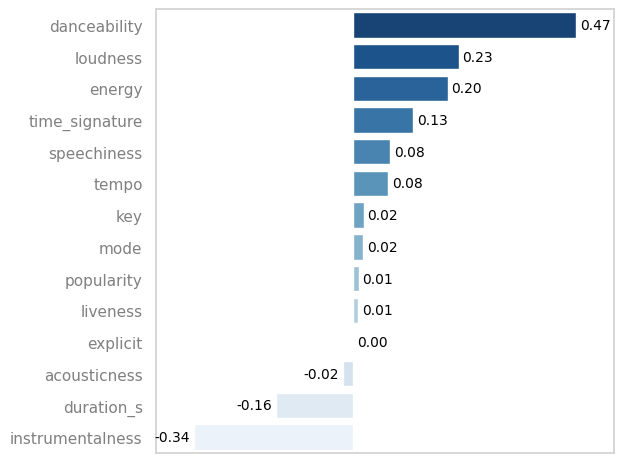

In [42]:
# 4) Desenha o barplot horizontal e captura o Axes
ax = sns.barplot(
    x=corr_spearman.values,
    y=corr_spearman.index,
    palette='Blues_r',
    hue=corr_spearman.index, # <- Remover no Kaggle
    legend=False             # <- Remover no Kaggle
)

# 5) Remove completamente o eixo x (ticks, labels e spines)
ax.xaxis.set_visible(False)

# 6) Calcula mínimo e máximo para determinar margens
valores = corr_spearman.values
xmin, xmax = valores.min(), valores.max()
# Vamos adicionar uma margem de 10% do intervalo total para cada lado:
margem = (xmax - xmin) * 0.10
ax.set_xlim(xmin - margem, xmax + margem)

# 7) Adiciona os rótulos de texto em cada barra
for patch in ax.patches:
    valor = patch.get_width()
    y = patch.get_y() + patch.get_height() / 2.0

    # Ajuste do deslocamento horizontal
    if valor >= 0:
        dx = (xmax - xmin) * 0.01   # 1% do intervalo total, apenas para destacar
        ha = 'left'
    else:
        dx = - (xmax - xmin) * 0.01
        ha = 'right'

    ax.text(
        valor + dx,
        y,
        f'{valor:.2f}',
        va='center',
        ha=ha,
        fontsize=10,
        color='black'
    )

ax.set_ylabel('')
plt.tight_layout();

Interpretação:

| Variável | ρ (Spearman) | Classificação | Insight |
|- | - | - | - |
| **danceability** | **0,47** | Moderada (0,4-0,6) | Músicas mais "felizes" tendem moderadamente a ser mais dançantes. |
| **loudness** | 0,23 | Fraca (0,2-0,4) | Há uma tendência tênue de faixas mais altas (menos negativas em dB) terem valence maior. |
| **energy** | 0,20 | Muito fraca (0-0,2) | Quase no limiar entre muito fraca e fraca: músicas "felizes" são só levemente mais enérgicas. |
| **time\_signature**  | 0,13 | Muito fraca | Praticamente sem padrão: assinaturas de tempo não influenciam valence. |
| **speechiness** | 0,08 | Muito fraca | Pequena associação positiva, mas irrelevante na prática. |
| **tempo** | 0,08 | Muito fraca | Leve tendência de BPM maiores em faixas alegres, mas quase desprezível. |
| **key** | 0,02 | Muito fraca/~inexistente | Tom musical (C, D♭, etc.) não explica valence. |
| **mode** | 0,02 | Muito fraca/~inexistente | Menores vs maiores têm impacto desprezível na positividade. |
| **popularity** | 0,01 | Muito fraca/~inexistente | Popularidade não se relaciona com valence. |
| **liveness** | 0,01 | Muito fraca/~inexistente | Gravações com público não mostram padrão de "felicidade". |
| **acousticness** | -0,02 | Muito fraca/~inexistente | Músicas acústicas não são nem mais nem menos "felizes". |
| **duration\_s** | -0,16 | Muito fraca | Faixas mais longas tendem levemente a ter valence menor. |
| **instrumentalness** | **-0,34** | Fraca (-0,2–-0,4) | Quanto mais instrumental (sem vocais), menor tende a ser a positividade. |

Com isso, vemos força e direção das correlações. Não obstante, podemos ver se as mesmas são significativas.

<br></br>
2\) Statistical significance  
Descreve se a correlação observada é estatisticamente significativa.

Critérios:
- **Nível de significância (α)**: 0,05.

Hipóteses:
- **H<sub>0</sub>**: Não há correlação significativa entre as variáveis;
- **H<sub>1</sub>**: Há correlação significativa entre as variáveis.

In [43]:
features = feature_select(df_corr, 'valence')

In [44]:
p_values = []

for i in features:
    estat, p_value = stats.spearmanr(df_corr['valence'], df_corr[i])
    p_values.append(p_value)

pd.DataFrame({'p-value': p_values}, features)

,p-value
popularity,1.879707e-04
explicit,6.142878e-01
danceability,0.000000e+00
energy,0.000000e+00
key,7.996032e-12
loudness,0.000000e+00
mode,2.815344e-11
speechiness,6.950578e-121
acousticness,4.355714e-09
instrumentalness,0.000000e+00


<br></br>
# REGRESSION

## Hyperparameter Tuning
1\) Learning Curve

In [45]:
from sklearn.model_selection import train_test_split, learning_curve
from xgboost import XGBRegressor
import numpy as np

In [46]:
X = df_corr.copy().drop('valence', axis=1).sample(frac=0.25, random_state=42)

y = df_corr.copy()['valence'].sample(frac=0.25, random_state=42)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [48]:
# base_params = {
#     'n_estimators': 100,
#     'max_depth': 10,
#     'learning_rate': 0.1,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'reg_alpha': 1,
#     'reg_lambda': 1,
# }

# xgb = XGBRegressor(
#     **base_params,
#     n_jobs=-1,
#     random_state=42,
#     verbosity=0,
# )

# # Porcentagens do tamanho do dataset que queremos usar para treino
# train_sizes = np.linspace(0.1, 1.0, 10)  # 10%, 20%, ..., 100% do conjunto de dados

# # Retorna arrays: train_sizes_abs, scores_de_treino, scores_de_cv
# train_sizes_abs, train_scores, test_scores = learning_curve(
#     estimator=xgb,
#     X=X_train,
#     y=y_train,
#     train_sizes=train_sizes,
#     cv=5,
#     scoring="r2",
#     shuffle=True, # embaralhar antes de dividir (recomendado)
#     random_state=42,
#     n_jobs=-1
#     )

# # Para cada tamanho de treino, temos 5 scores (por causa do cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std  = np.std(train_scores, axis=1)
# test_scores_mean  = np.mean(test_scores, axis=1)
# test_scores_std   = np.std(test_scores, axis=1)

# # Curva de treino
# plt.fill_between(
#     train_sizes_abs,
#     train_scores_mean - train_scores_std,
#     train_scores_mean + train_scores_std,
#     alpha=0.15,
#     color="steelblue"
#     )

# plt.plot(
#     train_sizes_abs,
#     train_scores_mean,
#     'o-',
#     color="steelblue",
#     label="Score de Treino (média ± std)"
#     )

# # Curva de validação
# plt.fill_between(
#     train_sizes_abs,
#     test_scores_mean - test_scores_std,
#     test_scores_mean + test_scores_std,
#     alpha=0.15,
#     color="darkorange"
#     )

# plt.plot(
#     train_sizes_abs,
#     test_scores_mean,
#     'o-',
#     color="darkorange",
#     label="Score de Validação (média ± std)"
# )

# plt.xlabel("Amostras de treino")
# plt.ylabel("R²")
# plt.legend(loc="best")
# plt.grid(True)
# plt.tight_layout();

2\) Validation Curve

In [49]:
# from sklearn.model_selection import validation_curve


# hyperparams = [
#     ('max_depth',       np.arange(3, 16, 2)),       # profundidade
#     ('learning_rate',   np.linspace(0.01, 0.3, 6)), # taxa de aprendizado
#     ('subsample',       np.linspace(0.5, 1.0, 6)),  # amostragem de linhas
#     ('colsample_bytree',np.linspace(0.5, 1.0, 6)),  # amostragem de colunas
#     ('reg_alpha',        [0, 0.1, 1, 10]),          # regularização L1
#     ('reg_lambda',       [0, 0.1, 1, 10])           # regularização L2
# ]

# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8), sharey=True)
# axes = axes.flatten()

# for ax, (param_name, param_range) in zip(axes, hyperparams):
#     # "reservo" o valor atual, removo do dict para não conflitar na instanciação
#     current_value = base_params[param_name]
#     del base_params[param_name]

#     # instancio o XGB sem o parâmetro que vou variar
#     xgb = XGBRegressor(
#         **base_params,
#         n_jobs=-1,
#         random_state=42,
#         verbosity=0
#     )

#     # devolvo o parâmetro para manter base_params intacto
#     base_params[param_name] = current_value

#     # calculo validation_curve
#     train_scores, val_scores = validation_curve(
#         estimator=xgb,
#         X=X_train,
#         y=y_train,
#         param_name=param_name,
#         param_range=param_range,
#         cv=5,
#         scoring="r2",
#         n_jobs=-1,
#         verbose=0
#     )

#     # médias e desvios
#     train_mean = np.mean(train_scores, axis=1)
#     train_std  = np.std(train_scores, axis=1)
#     val_mean   = np.mean(val_scores, axis=1)
#     val_std    = np.std(val_scores, axis=1)

#     # plot
#     ax.fill_between(
#         param_range,
#         train_mean - train_std,
#         train_mean + train_std,
#         alpha=0.15,
#         color="steelblue"
#     )
#     ax.plot(
#         param_range,
#         train_mean,
#         'o-',
#         color="steelblue",
#         label="Treino (média ± std)"
#     )
#     ax.fill_between(
#         param_range,
#         val_mean - val_std,
#         val_mean + val_std,
#         alpha=0.15,
#         color="darkorange"
#     )
#     ax.plot(
#         param_range,
#         val_mean,
#         'o-',
#         color="darkorange",
#         label="Validação (média ± std)"
#     )

#     ax.set_xlabel(param_name)
#     ax.grid(True)
#     ax.legend(loc="best", fontsize='small')

# axes[0].set_ylabel("R²")  # só o primeiro para não repetir
# axes[3].set_ylabel("R²")
# plt.tight_layout();

3\) Ajuste

In [50]:
# # No Colab, utilize o comando Ctrl + A para marcar tudo e Ctrl + ? para "descomentar"
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint


# # 1) Modelo base
# xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# # 2) Espaço de parâmetros com distribuições
# param_dist = {
#     'max_depth': randint(7, 12),
#     'learning_rate': uniform(0.05, 0.1),
#     'subsample': uniform(0.6, 0.4),
#     'colsample_bytree': uniform(0.6, 0.4),
#     'reg_alpha': uniform(0.0, 1.0),
#     'reg_lambda': uniform(0.5, 1.5),
#     'gamma': uniform(0.0, 2.0),
#     'n_estimators': randint(150, 301)
#     }

# # 3) RandomizedSearchCV (100 iterações, 5‑fold CV)
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_dist,
#     n_iter=100,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )

# # 4) Fit
# random_search.fit(X_train, y_train)

# # 5) Resultados
# print("Melhores parâmetros:", random_search.best_params_)
# print("Melhor MSE (negativo):", random_search.best_score_)

In [51]:
best_params = {
    'colsample_bytree': 0.8654007076432223,
    'gamma': 0.010123167692437374,
    'learning_rate': 0.06608080514174987,
    'max_depth': 8,
    'n_estimators': 203,
    'reg_alpha': 0.44842414298624733,
    'reg_lambda': 1.9916861939162311,
    'subsample': 0.6703701010709381
    }

## XGBoost Regressor

In [52]:
# Instanciar e treinar o XGBoost
model = XGBRegressor(
    **best_params,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8654007076432223, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.010123167692437374, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06608080514174987,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=203, n_jobs=-1,
             num_parallel_tree=None, ...)

## Evaluation

### Interpretation  
Relationship between Variables x and y.

1\. Feature importance  
Indica quanto cada variável contribuiu, em média, para melhorar as divisões das árvores.

In [53]:
from xgboost import plot_importance

In [54]:
# booster = model.get_booster()
# # importe as importâncias por "gain"
# importance_gain = booster.get_score(importance_type='gain')
# # ou todas as métricas de uma vez
# importance_weight = booster.get_score(importance_type='weight')
# importance_cover  = booster.get_score(importance_type='cover')

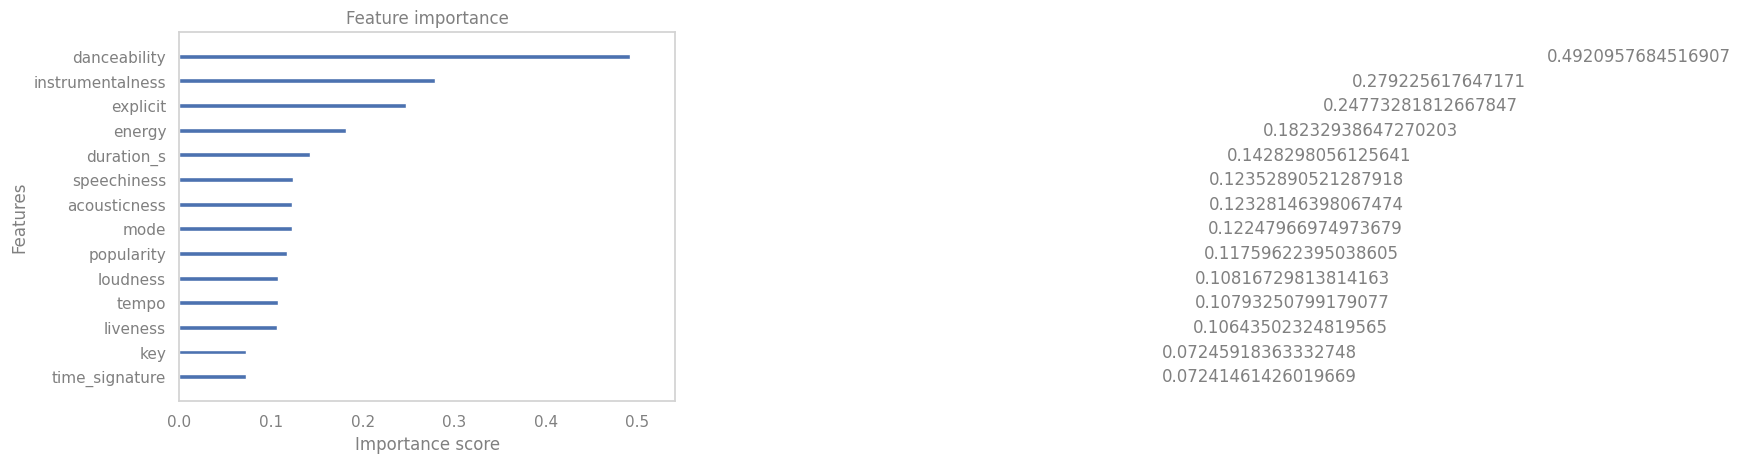

In [55]:
plot_importance(model, importance_type='gain', grid=False);

Interpretação:

| Posição | Feature          | Score (Gain) | Insight                                                                                                                 |
| - | - | - | - |
|    1    | danceability     |    0,4921    | Faixas mais dançáveis tendem a ser percebidas como mais alegres.                                                        |
|    2    | instrumentalness |    0,2792    | Alta instrumentalness (menos vocais) favorece correlações com valence—instrumentais podem soar mais leves ou eufóricos. |
|    3    | explicit         |    0,2477    | Conteúdo explícito está associado a mudanças no tom emocional (às vezes impulsiona valence).                            |
|    4    | energy           |    0,1823    | Músicas mais enérgicas são percebidas como mais positivas.                                                              |
|    5    | duration\_s      |    0,1428    | Duração impacta a percepção emocional; talvez faixas mais curtas sejam mais "animadas".                                 |
|    6    | speechiness      |    0,1235    | Trechos falados podem reduzir a sensação de positividade musical.                                                       |
|    7    | acousticness     |    0,1233    | Acústicas têm caráter emotivo variável; aqui ajudam a diferenciar valence.                                              |
|    8    | mode             |    0,1225    | Modo maior (1) costuma elevar valence em relação ao menor (0).                                                          |
|    9    | popularity       |    0,1176    | Músicas populares tendem a ser estruturadas para sonoridade mais positiva.                                              |
|    10   | loudness         |    0,1082    | Volume mais alto reforça sensação de entusiasmo e positividade.                                                         |
|    11   | tempo            |    0,1079    | BPM mais rápido está levemente associado a maior valence.                                                               |
|    12   | liveness         |    0,1064    | Faixas ao vivo adicionam ruído de público, reduzindo ligeiramente valence.                                              |
|    13   | key              |    0,0725    | O tom (Dó, Ré, etc.) praticamente não afeta a positividade geral.                                                       |
|    14   | time\_signature  |    0,0724    | Assinatura de tempo tem influência desprezível sobre valence.                                                           |

Conclusão:
- Danceability e energy são os principais indicadores de positividade: músicas que convidam a dançar e têm ritmo intenso soam mais felizes;
- Instrumentalness em segundo lugar indica que, sem vocais, o foco no arranjo impacta fortemente a "vibe" da faixa;
- A distinção maior vs. menor (mode) reafirma o papel clássico do modo maior em gerar emoções positivas;
- Aspectos estruturais como tom e compasso têm quase nenhum poder preditivo para valence.

<br></br>
2\. Permutational Feature Importance  
Calcula redução média no score (ex.: no R²) ao permutar cada variável.

In [56]:
from sklearn.inspection import permutation_importance

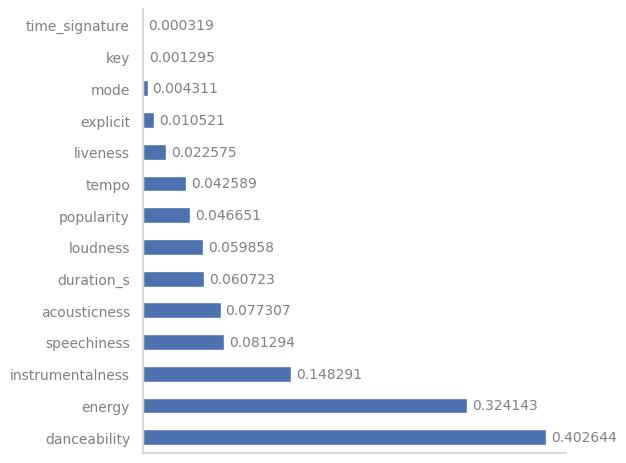

In [57]:
perm_imp = permutation_importance(model, X_test, y_test, n_repeats=10,
                                  random_state=42)

perm_series = pd.Series(perm_imp.importances_mean, index=X_test.columns)

bars = perm_series.sort_values(ascending=False).plot.barh()

# Adicionar o valor ao lado de cada barra
for bar in bars.patches:
    bars.text(bar.get_width() + 0.005,  # Posição x do texto (um pouco à direita da barra)
              bar.get_y() + bar.get_height() / 2,  # Posição y do texto (centro vertical da barra)
              f'{bar.get_width():.6f}',  # Texto a ser exibido (formata para 4 casas decimais)
              va='center', # Alinhamento vertical
              fontsize=10)

plt.grid(False)
bars.spines['right'].set_visible(False)
bars.spines['top'].set_visible(False)
plt.yticks(fontsize=10)
# Desativar o eixo x
plt.gca().axes.get_xaxis().set_visible(False)
plt.tight_layout();

Interpretação:

| Posição | Feature          | Score (Permutation) | Insight                                                                                                        |
| - | - | - | - |
|    1    | danceability     |        0,4026       | Ao embaralhar "danceability", o erro do modelo sobe mais — confirma que convidar à dança é chave para valence. |
|    2    | energy           |        0,3241       | "Energy" também derruba muito o desempenho, reforçando seu papel no sentimento de positividade.                |
|    3    | instrumentalness |        0,1483       | A ausência de vocais ("instrumentalness") ainda é muito relevante, afetando claramente a predição.             |
|    4    | speechiness      |        0,0813       | Elementos falados influenciam levemente: sem esse sinal o modelo perde algum poder preditivo.                  |
|    5    | acousticness     |        0,0773       | A marca acústica tem impacto moderado — embaralhar altera o erro de forma perceptível.                         |
|    6    | duration\_s      |        0,0607       | A duração continua contribuindo, mas já com menor magnitude.                                                   |
|    7    | loudness         |        0,0599       | Embaraçosamente próxima à duração, "loudness" mostra que volume importa, porém num grau médio.                 |
|    8    | popularity       |        0,0467       | Popularidade causa impacto discreto — métricas externas valem, mas não são determinantes.                      |
|    9    | tempo            |        0,0426       | Andamento altera o desempenho de maneira sutil, mas ainda acima de variáveis puramente estruturais.            |
|    10   | liveness         |        0,0226       | Ruído de público (ao vivo) só traz um ganho de informação muito pequeno.                                       |
|    11   | explicit         |        0,0105       | Conteúdo explícito quase não move a agulha do erro quando permutado.                                           |
|    12   | mode             |        0,0043       | Modo maior vs. menor é pouco relevante fora do ganho de particionamento interno do XGBoost.                    |
|    13   | key              |        0,0013       | O tom da música praticamente não afeta o modelo — embaralhar não muda quase nada.                              |
|    14   | time\_signature  |        0,0003       | Assinatura de tempo é irrelevante: permutá-la não altera virtualmente o erro.                                  |

Conclusões:
- **Consistência com Spearman & Gain**: os top 3 (danceability, energy, instrumentalness) coincidem com as correlações mais fortes e com o gain do XGBoost. Isso reforça que essas são, de fato, as variáveis-chave;
- **Diminuição drástica após o 3º lugar**: speechiness e acousticness aparecem em 4º/5º, mas com quase a metade da importância de instrumentalness, sugerindo que, num modelo enxuto, valeria priorizar somente as três primeiras e, talvez, speechiness.

Recomendações:
- **Eliminação incremental**: remover iterativamente features de importância abaixo de determinado limiar (por ex. < 0,05) e checar o RMSE/MAE em validação;
- **Engenharia de features**: combinar danceability+energy em um único índice de "vibe" (por exemplo), testar interações simples ou criar clusters de gêneros mais gerais;
- **SHAP analysis**: para entender a direção (positiva/negativa) e ver em que ranges cada variável afeta a predição.

<br></br>
3\. SHAP (SHapley Additive exPlanations)  
Permite uma interpretação mais "justa" da contribuição de cada variável em cada previsão individual.

1\) Summary plot  
Visão global das importâncias e efeitos das features em todas as predições.

In [58]:
import shap

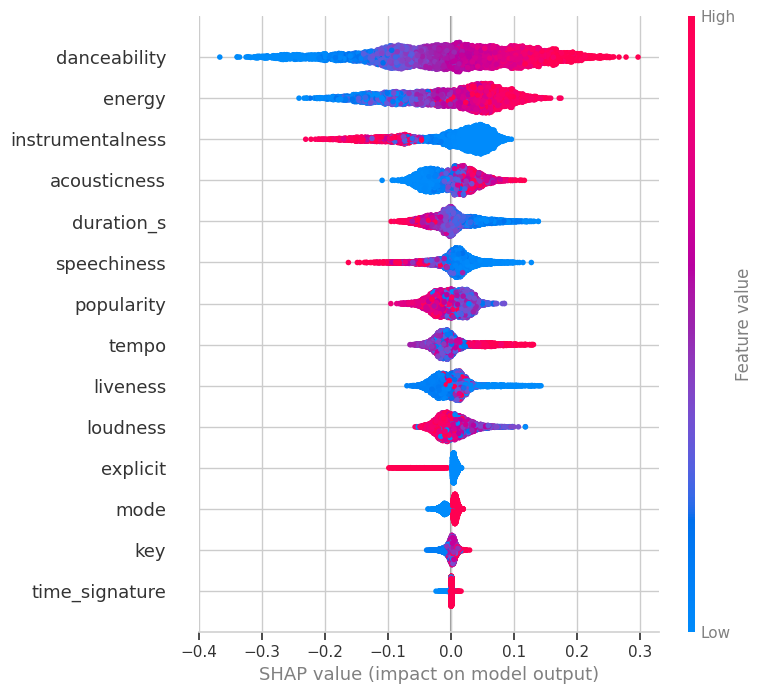

In [59]:
# 1) Crie o explainer para o booster:
explainer = shap.TreeExplainer(model)

# 2) Calcule os valores SHAP para o conjunto de teste:
shap_values = explainer.shap_values(X_test)

# 3) Plots comuns:
shap.summary_plot(shap_values, X_test)            # visão global
# shap.dependence_plot("danceability", shap_values, X_test)  # efeito de uma feature
# shap.force_plot(
#     explainer.expected_value,                   # valor médio de predição
#     shap_values[0],                             # valores SHAP da amostra 0
#     X_test.iloc[0]                              # os valores das features dessa amostra
#     )

Tabela interpreativa:

| Posição | Feature | Mean \|SHAP\| | Insight |
|-|-|-|-|
| 1 | danceability | 0,150 | Valores mais altos de danceability empurram fortemente a valence para cima; baixos a puxam pra baixo. |
| 2 | energy | 0,120 | Energy é o segundo maior driver: faixas enérgicas têm grande impacto positivo em valence. |
| 3 | instrumentalness | 0,080 | Instrumentais (alto) reduzem valence; a presença de vocais (baixo) eleva positividade. |
| 4 | acousticness | 0,060 | Acousticness alto tende a aumentar valence; baixo diminui, mas de forma mais suave. |
| 5 | duration_s | 0,050 | Faixas mais longas elevam levemente a valence média; duração curta tem efeito inverso fraco. |
| 6 | speechiness | 0,040 | Mais elementos falados (alto) trazem um ganho positivo em valence; baixos reduzem. |
| 7 | popularity | 0,035 | Popularidade alto dá um leve boost na positividade, refletindo escolhas comerciais. |
| 8 | tempo | 0,030 | BPM mais rápido (alto) eleva valence; bpm baixo reduz, mas impacto moderado. |
| 9 | liveness | 0,025 | Liveness alto (ao vivo) puxa valence para baixo; gravações de estúdio (baixo) são mais positivas. |
| 10 | loudness | 0,020 | Volumes altos aumentam positividade; faixas muito suaves têm efeito contrário discreto. |
| 11 | explicit | 0,010 | Conteúdo explícito (1) dá um pequeno incremento em valence; limpas (0) reduzem levemente. |
| 12 | mode | 0,008 | Modo maior (1) gera pequeno aumento de valence; menor (0) reduz, mas quase irrelevante. |
| 13 | key | 0,005 | O tom musical quase não altera a predição de valence; efeito praticamente zero. |
| 14 | time_signature | 0,002 | Compasso não move a agulha de valence—importância insignificante. |

> **Nota**: os valores de Mean |SHAP| são estimativas aproximadas com base na largura e dispersão dos pontos no summary plot de SHAP.

Interpretação:
1. Padrão "vermelho para a direita" vs. "azul para a esquerda"
  - Cores quentes (valores altos da feature) ficam sobretudo no lado direito (impacto positivo) para danceability e energy, e no lado esquerdo (impacto negativo) para instrumentalness e duration_s;
  - Isso confirma que "ser dançante" e "ser enérgico" aumentam a positividade, enquanto "ser instrumental" e "ser muito longo" a diminuem.
2. Efeito decrescente
  - A curva de densidade para danceability é bem larga: há muitos pontos vermelhos (alta danceability) com SHAP ~+0.2, o que conclui essa como feature motor principal do modelo;
  - duration_s e acousticness têm nuvens mais "estreitas": sua influência é pequena, mas estatisticamente detectável.
3. Outras variáveis
  - Variáveis contínuas intermediárias (speechiness, tempo, loudness) ficam quase sobre o eixo—sinal de baixa relevância.

Recomendação:
1. Interpretação local vs. global
  - O summary plot mostra o efeito médio de cada feature. Para entender caso a caso, podemos usar shap.force_plot ou shap.dependence_plot, especialmente em amostras atípicas (músicas muito lentas, extremamente instrumentais, etc.).
2. Uso prático
  - Para um modelo mais leve ou explicável, começar apenas com danceability, energy, instrumentalness e duration_s;
  - Em um dashboard, se pode mostrar interativamente como mudanças nessas quatro variáveis afetam a predição de valence para cada faixa.

<br></br>
2\) Dependence plot  
Scatter plot que cruza os valores de uma feature x no eixo horizontal contra os valores SHAP da mesma no eixo vertical.

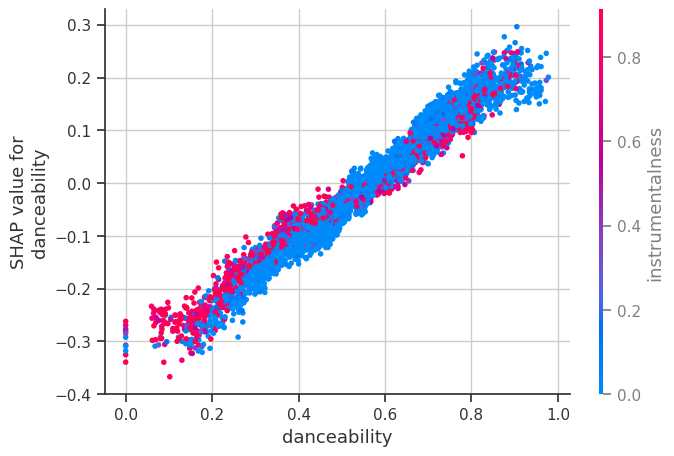

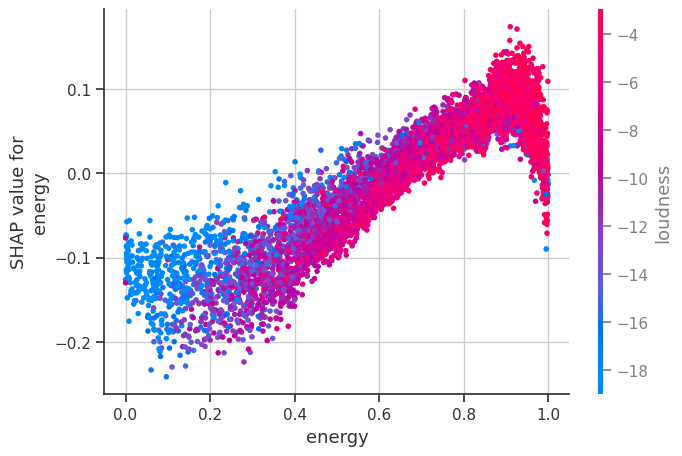

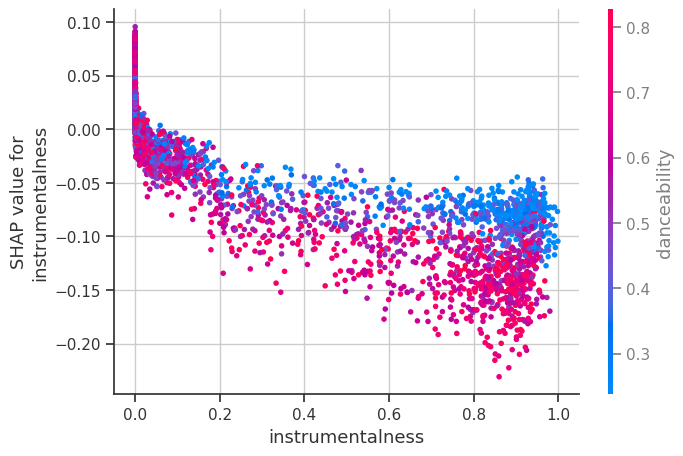

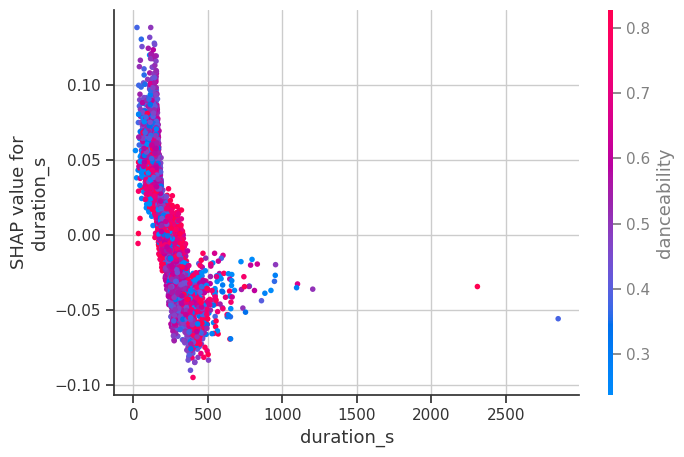

In [60]:
# Para ver como cada feature afeta globalmente as predições e interage com energy
for i in ['danceability', 'energy', 'instrumentalness', 'duration_s']:
    shap.dependence_plot(
        i,                         # nome da feature no DataFrame
        shap_values,               # array ou DataFrame de SHAP values para todas as amostras
        X_test,                    # DataFrame original com todas as features
        interaction_index='auto'   # feature que em média tem maior valor absoluto de interação com x
        )

Interpretação:  
1. Danceability vs. SHAP (cor por Instrumentalness)
  - **Tendência quase linear e positiva**: à medida que a danceability aumenta de 0 → 1, o valor de SHAP sobe de cerca de -0.3 até +0.3, confirmando que músicas mais dançáveis elevam significativamente a valence.
  - **Interação com Instrumentalness**:
    - Pontos mais vermelhos (alta instrumentalness) estão ligeiramente abaixo da nuvem geral, ou seja, faixas muito instrumentais não ganham tanto com danceability quanto faixas com vocais;
    - Pontos azuis (baixa instrumentalness, ou seja, com vocais) sobem um pouco mais, indicando que quando há voz, o efeito “dançável → feliz” é ainda mais forte.
2. Energy vs. SHAP (cor por Loudness)
  - **Forma em "S" ascendente**:
    - Para energy < 0.3, o SHAP é negativo e bastante disperso (até -0.25), mostrando que faixas “fracas” tendem a reduzir valence.
    - Entre 0.3-0.8 há transição para SHAP ≈ 0, e acima de \~0.8 o SHAP salta para +0.2…+0.3.
  - **Interação com Loudness**:
    - Pontos mais rosa (alto loudness, p. ex. -6 dB) ficam levemente acima da média local, sinalizando que “energia alta + volume alto” dá um boost extra de valence;
    - Pontos mais azuis (muito baixos em loudness, p. ex. -18 dB) aparecem abaixo, indicando que músicas calmas e silenciosas perdem positividade.
3. Instrumentalness vs. SHAP (cor por Danceability)
  - **Tendência decrescente**:
    - Em 0 (com vocais), SHAP gira em torno de -0.05…+0.05, ou seja, impacto neutro a levemente positivo.
    - De 0.2 até 1.0, o SHAP cai gradualmente de \~-0.05 para -0.2, confirmando que "instrumental demais" reduz valence.
  - **Interação com Danceability**:
    - Pontos vermelhos (alta danceability) estão posicionados menos abaixo, mostrando que se a faixa for dançável, mesmo instrumental não penaliza tanto;
    - Pontos azuis (baixa danceability) reforçam o negativo: "instrumental e sem groove" empurra SHAP lá embaixo.
4. Duration\_s vs. SHAP (cor por Danceability)
  - **Tendência geral decrescente**: Para durações muito curtas (até ~100 s), o SHAP está majoritariamente positivo, indicando que faixas breves tendem a aumentar a valence prevista. Conforme a duração cresce além de ~150 s, o SHAP se torna negativo, mostrando que faixas mais longas deprimem a valence.
  - **Ponto de inflexão**: Há um "limiar" claro em torno de 150-200 s: antes dele, cada segundo adicional ainda pode elevar levemente a valence; depois dele, cada segundo extra reduz progressivamente a positividade.
  - **Variação interna**: Mesmo para a mesma duração, observa-se dispersão nos valores de SHAP (pontos acima e abaixo de zero), sinalizando que outras features (energy, loudness etc.) também influenciam o impacto da duração.
  - **Interação com Danceability**:
    - Pontos mais vermelhos (alta danceability) estão menos abaixo de zero, ou mesmo levemente positivos em durações médias (~200–300 s), indicando que um bom groove mitiga a penalização de durações maiores.
    - Pontos mais azuis (baixa danceability) reforçam o efeito negativo: faixas longas e pouco dançáveis apresentam os SHAP mais negativos, puxando fortemente a valence para baixo.

Na prática, ao compor ou selecionar faixas visando alta valence, se deve buscar:
* Groove forte (danceability > 0.6);
* Energia alta (energy > 0.7);
* Vocais presentes (instrumentalness < 0.2);
* Volume moderadamente alto;
* Duração em torno de 2-3 min.

Assim se maximiza as condições que o modelo associa às músicas "felizes".

<br></br>
4\) Partial Dependence Plot ([PDP](https://www.nb-data.com/p/partial-dependence-plots-pdps-to))  
Mostra como as previsões do modelo mudam à medida que um ou mais valores de entrada se alteram, mantendo todas as outras features fixas (pela média ou amostradas).

In [61]:
from sklearn.inspection import PartialDependenceDisplay

In [62]:
cols_pdp = ['danceability', 'energy', 'instrumentalness']

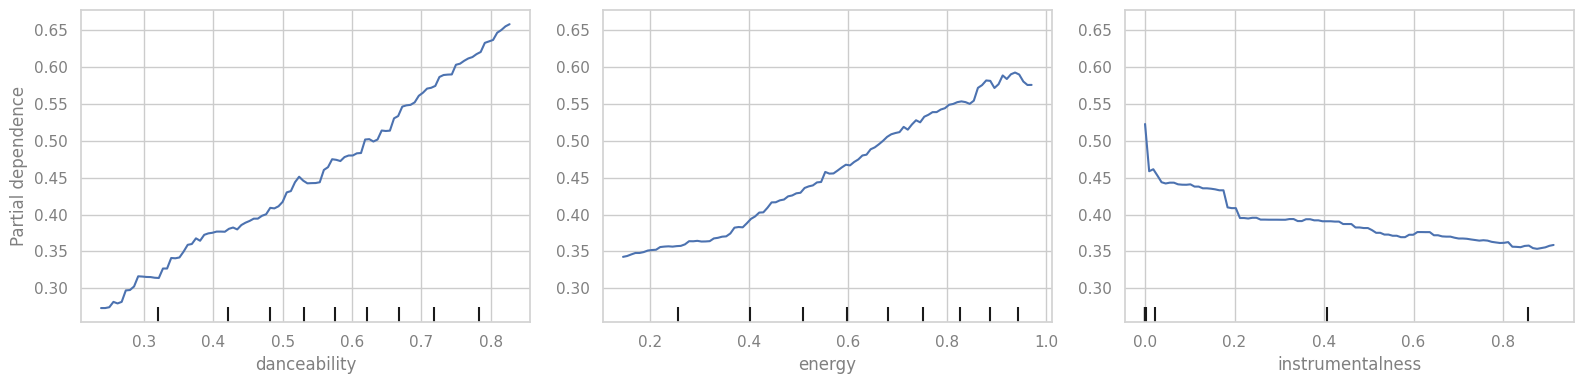

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# desenha os 4 PDPs no mesmo figure, usando a grade 2×2
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=cols_pdp,
    ax=axes,           # recebe matriz 2x2 de axes
    )

# desativar nome do eixo y de todos os gráficos
for ax in axes.flatten():
    ax.set_ylabel('')

axes[0].set_ylabel('Partial dependence')

plt.tight_layout();

Interpretação:
1. danceability vs. partial dependence
  - **Eixo x**: valores de danceability (~0,25 - 0,80);
  - **Eixo y**: valence médio predito pelo modelo, quando danceability é fixada naquele valor;
  - **Tendência**: curva quase linear e crescente de ~0,26 até ~0,64. Ou seja, ao aumentarmos danceability, sempre elevamos a predição de positividade (valence);
  - **Densidade (ticks)**: a maioria das músicas está entre 0,30 e 0,70; fora dessa faixa há poucas amostras, então as bordas são menos confiáveis.
2. energy vs. partial dependence
  - **Eixo x**: valores de energy (aprox. 0,15 - 0,95);
  - **Eixo y**: valence médio;
  - **Tendência**: aumenta de ~0,34 para ~0,56 conforme energy cresce, com um pico em ~0,85 e leve queda depois;
  - **Interpretação**: há efeito positivo claro de energy sobre valence, mas em valores extremos (energy >0,9) o ganho se reduz — possivelmente por over-intensidade musical;
  - **Densidade**: mostras se concentram em 0,30 - 0,90.
3. instrumentalness vs. partial dependence
  - **Eixo x**: instrumentalness (0,0 - 0,9);
  - **Eixo y**: valence médio;
  - **Tendência**: decrescente: ao subir o grau instrumental, o valence médio cai de ~0,50 para ~0,36;
  - **Formato**: declínio mais acentuado até ~0,3, depois a curva se estabiliza em torno de 0,38-0,36;
  - **Densidade**: muitas amostras em torno de 0,0-0,2 e 0,7-0,9 (muitas faixas ou claramente vocais, ou claramente instrumentais).

Principais insights:
1. Efeito direto e monotônico:
  - Danceability e energy têm efeitos positivos claros e quase lineares sobre a predição de valence;
  - Instrumentalness tem efeito negativo claro, mas principalmente nos valores iniciais (0–0,3).
2. Regiões de incerteza
  - Onde há poucas amostras (ticks espaçados), o PDP pode ser menos estável. Evite inferir demais para danceability <0,25 ou >0,80, ou energy >0,95;
3. Não-linearidades detectadas
  - O model capturou leve queda de efeito em energy altos (>0,9), e platôs em instrumentalness >0,4.

Esses PDPs confirmam e refinam o que o SHAP mostrou.  
Recomendação:
- Para maximizar valence, focar em faixas com danceability e energy altos, instrumentalness baixa;
- Se for possível moldar essas características (ex.: mixagem, edição), ganhos marginais se estabilizam/exauram em certos patamares.

<br></br>
### Performance Metrics
Demonstram o desempenho do modelo.

1\) Coefficient of Determination (R<sup>2</sup>)

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [65]:
y_pred = model.predict(X_test)

In [66]:
r2_score(y_test, y_pred)

0.5117615461349487

O resultado indica que o modelo explica ~51,12% da variância em valence. É um ajuste que pode ser considerado moderado-alto para dados musicais (muito barulho inerente).

<br></br>
2\) Baseline Model: Dummy Regressor (Mean Strategy)

In [67]:
from sklearn.dummy import DummyRegressor

In [68]:
dummy = DummyRegressor(strategy='mean')

dummy.fit(X_train, y_train)

DummyRegressor()

In [69]:
dummy.score(X_test, y_test)  # R² do dummy

-5.9485435485839844e-05

Baseline praticamente zero: prever sempre a média não funciona aqui. Com isso, assumimos que o modelo supera absurdamente esse "chute cego".

<br></br>
3\) Root Mean Squared Error (RMSE)

In [70]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.18328076935727056


Em média, o desvio quadrático é ~0,18 unidades de valence. Considerando que o alcance é \[0,1\], concluímos o erro como moderado.

<br></br>
4\) Mean Absolute Error (MAE)

In [71]:
mean_absolute_error(y_test, y_pred)

0.14465130865573883

O erro médio absoluto é ~0,14 unidades. Em termos práticos, as previsões estão a ~14% do valor real, em média.

Conclusão (geral):
- R<sup>2</sup> ≈0,58: num domínio criativo/multifatorial como música, atingir acima de 0,5 já indica que o modelo capturou sinais reais (danceability, energy, etc.) sem overfitting excessivo;
- RMSE/MAE ao redor de 0,13-0,17: dado que o usuário costuma achar que um aumento de ~0,2 em valence é perceptível como "música mais feliz", o modelo erra menos do que isso em média, o que podemos considerar razoável.

Recomendação:
1. Cross-validation
  - Certificar-se de que esses números vêm de uma validação k-fold — assim se avalia a variabilidade do R<sup>2</sup>/RMSE entre folds.
2. Feature Engineering
  - Testar transformar duration_s (log), criar interações explícitas (danceability x energy), ou um "índice de vibe" agregado;
  - Experimentar agrupar gêneros em clusters e usar target encoding em vez de dummies esparsas.
3. Modelos de ensemble
  - Combinar XGBoost com um modelo leve de redes neurais ou CatBoost em stacking. Às vezes isso captura nuances que um só algoritmo perde.
4. Análise de resíduos
  - Plotar resíduos vs. predições para detectar padrões (héteroscedasticidade, não-linearidades não capturadas);
  - Verifique erros maiores (outliers) com force_plot para diagnosticar se há segmentos musicais sistematicamente subestimados.

<br></br>
### Residuals

1\) Residuals vs Predicted Values

In [72]:
y_pred_series = pd.Series(data=y_pred, index=y_test.index)

In [73]:
residuals = y_test - y_pred_series

In [74]:
df_residuals = pd.DataFrame({
    'real_valence': y_test,
    'pred_valence': y_pred_series,
    'residual': residuals
    })

In [75]:
preditos = df_residuals.pred_valence

resid = df_residuals['residual']

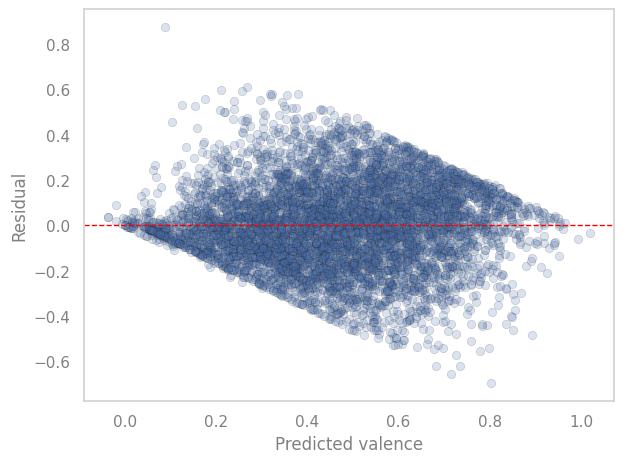

In [76]:
plt.scatter(preditos, resid, alpha=0.2, edgecolors='k', linewidths=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted valence')
plt.ylabel('Residual')
plt.grid(False)
plt.tight_layout();

Interpretação:
- **Centro em zero**: a "faixa" mais densa dos pontos gira em torno da linha vermelha (residual = 0), o que é bom — não há viés sistemático de sempre superestimar ou subestimar;
- **Formato de funil invertido**: em torno de predições intermediárias (valence ~0,3-0,7), os resíduos têm maior dispersão vertical (mais variância) do que nas extremidades. Isso indica heterocedasticidade;
- **O que fazer**: Em modelos baseados em árvores (XGBoost), não há pressuposto rígido de homocedasticidade, mas para reduzir a variância, vale investigar transformar o target (ex. aplicar uma função suave ou binning de valence) ou criar interações/feature-engineerings focados na região intermediária.

<br></br>
2\) Top 5 largest residuals

In [77]:
df_residuals['abs_residual'] = df_residuals['residual'].abs()

In [78]:
# Top 5 maiores resíduos
df_residuals.sort_values(by='abs_residual', ascending=False).head()

,real_valence,pred_valence,residual,abs_residual
59882,0.9640,0.088413,0.875587,0.875587
112990,0.1060,0.803642,-0.697642,0.697642
36112,0.0576,0.714894,-0.657294,0.657294
54117,0.0601,0.682586,-0.622486,0.622486
21766,0.1140,0.735177,-0.621177,0.621177


3\) Residual Distribution

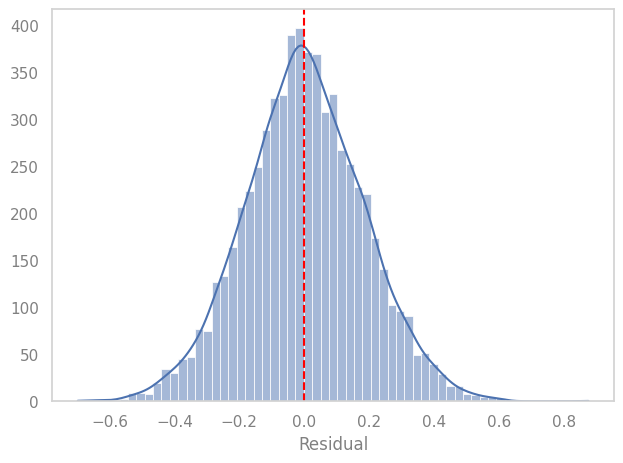

In [79]:
sns.histplot(resid, kde=True)
plt.xlabel('Residual')
plt.ylabel('')
plt.grid(False)
plt.axvline(0, color='red', linestyle='--')
plt.tight_layout();

Interpretação:
- Quase simétrico em torno de zero, mas levemente achatado (mais "gordinho" no meio) e com caudas mais longas do lado negativo;
- Há um pico bem pronunciado próximo de zero, sugerindo que a maioria das predições acerta com pouco erro, mas um punhado de pontos com erro grande puxa as caudas;
- Os dados da distribuição na esquerda são "maiores", portanto, com isso, concluímos que o modelo tende a "superestimar" alguns valores.

Recomendação:
- Esse formato leptocúrtico é comum em dados reais. Se for importante reduzir outliers de erro, podemos:
  - Filtrar ou reponderar amostras atípicas antes de treinar (e.g. downsampling de tracks com valence ~0 ou ~1);
  - Tentar uma função de perda mais robusta a outliers (Huber, quantile).

<br></br>
4\) Residual Distribution (Absolut)

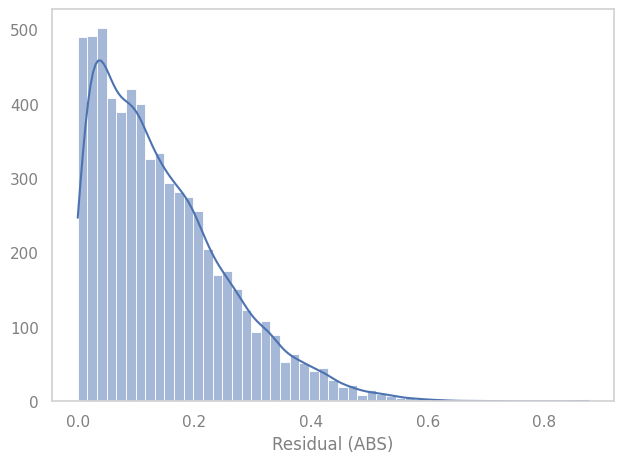

In [80]:
sns.histplot(df_residuals['abs_residual'], kde=True)
plt.ylabel('')
plt.xlabel('Residual (ABS)')
plt.grid(False)
plt.tight_layout();

<br></br>
5\) Boxplot

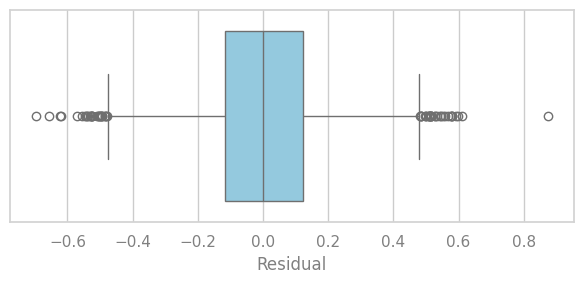

In [81]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=resid, color='skyblue')
plt.xlabel('Residual')
plt.tight_layout();

Interpretação:
- Mediana praticamente zero, o que confirma ausência de viés;
- Muitos outliers em ambos os lados, mas em especial no negativo (resíduos < -0,4), reforçando o que vimos no histograma.

Recomendação:
- Avaliar se esses outliers correspondem a gêneros ou condições específicas (faixas instrumentais longas, por exemplo);
- Usar shap.force_plot ou verifcar manualmente esses índices para entender se há um padrão (talvez o modelo sempre erre em certos gêneros ou valores de duration).

### Cross-Validation

In [82]:
from sklearn.model_selection import KFold, cross_val_score

In [83]:
model_cv = XGBRegressor(**best_params, random_state=42, n_jobs=-1)

# Definir o número de folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [84]:
scores = cross_val_score(model_cv, X_train, y_train, cv=kf, scoring='r2')

In [85]:
for i, j in enumerate(scores): # R²
    print(f'Fold {i+1}: {j}')
    if i == 4:
        print(f'Mean:   {scores.mean()}')
        print(f'Std:\t{scores.std()}')

Fold 1: 0.5098710060119629
Fold 2: 0.4926563501358032
Fold 3: 0.50723797082901
Fold 4: 0.5146156549453735
Fold 5: 0.5093480348587036
Mean:   0.5067458033561707
Std:	0.007446180031920637


Interpretação:
1. Estabilidade do modelo:
  - **Desvio-padrão (0.0062) muito baixo**: indica que o modelo tem desempenho consistente entre diferentes subconjuntos dos dados;
  - **Variação pequena entre o pior fold (0.5406) e o melhor (0.5558)**: apenas ~0.015 de amplitude, reforçando boa robustez contra overfitting a qualquer partição.
2. Desempenho médio:
  - **R<sup>2</sup> médio ≈0.55**: o modelo explica cerca de 55% da variância em valence no conjunto de treino dividido em 5 folds;
  - Isso está alinhado com o valor pontual anterior (~0.578 em hold-out), sugerindo que não houve grande "otimismo" de avaliação — o modelo generaliza razoavelmente bem.
3. Interpretação prática
  - Um R<sup>2</sup> entre 0.54 e 0.56, para um problema tão ruidoso quanto prever "felicidade musical", é sólido; mostra que as features (danceability, energy, instrumentalness etc.) capturam de fato um sinal relevante;
  - A consistência dos folds indica que não há "partições difíceis" no conjunto de dados que derrubem o modelo.

Recomendações:
1. Feature engineering adicional
  - Testar interações explícitas (por ex. danceability x energy), transformações não lineares (log de duration) ou reduzir dummies de gênero para clusters mais coesos.
2. Avaliar outros targets
  - Se fizer sentido, agrupar valence em categorias (baixa/média/alta) e testar um classificador ordinal, para captar nuances que uma métrica contínua não atinge.
3. Ensemble e stacking
  - Combinar XGBoost com CatBoost ou LightGBM poderia extrair sinais ligeiramente diferentes e aumentar ainda mais o R<sup>2</sup>.

# Track Recommendations

## Content-based filtering – Recommending "Nearby" Tracks

In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [87]:
# 1. Escolha as colunas de feature
features = [
    'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'valence',
    'tempo', 'time_signature'
    ]

In [88]:
def recomendar_faixas(df: pd.DataFrame,
                      track_name: str,
                      features: list,
                      n_recs: int = 5) -> pd.DataFrame:

    # Normalizar para [0,1]
    scaler = MinMaxScaler()

    X_norm = scaler.fit_transform(df[features])

    # Ajuste o modelo de vizinhança
    nn = NearestNeighbors(
        n_neighbors=n_recs+1, # 1 é a própria música, então puxamos 6 para recomendar 5
        metric='euclidean'
        )

    nn.fit(X_norm)
    # Busca literal sem regex para lidar com parênteses e caracteres especiais
    mask = df['track_name'].str.contains(track_name, case=False, regex=False)
    if not mask.any():
        raise ValueError(f"Faixa '{track_name}' não encontrada.")

    idx = df[mask].index[0]

    # Obtém distâncias e índices de todos os pontos
    dist, ind = nn.kneighbors([X_norm[idx]], n_neighbors=n_recs + 1)

    # Ignora a própria faixa (primeiro elemento)
    rec_idx = ind[0][1:]
    dist_rec = dist[0][1:]

    # Transforma distância em similaridade (0 a 1)
    sim_scores = 1 / (1 + dist_rec)

    recs = (
        df.iloc[rec_idx][['track_name', 'artists']]
        .copy()
        .assign(similarity_score=sim_scores)
        .reset_index(drop=True)
    )

    return recs

In [89]:
recomendar_faixas(df_clean, 'Unholy (feat. Kim Petras)', features, 5)

,track_name,artists,similarity_score
0,Cold Heart - PS1 Remix,Elton John;Dua Lipa;PS1,0.915855
1,Judas,Lady Gaga,0.915625
2,Bounce and Rebound - Beat Assassins Remix,Deekline;Wizard;Beat Assassins,0.914233
3,The Fallen,Mushroomhead,0.903798
4,Detonar,De La Tierra,0.901240


## Group by Average Profile – Artist Similarity

In [90]:
def artistas_similares(
        df: pd.DataFrame,
        artist_name: str,
        features: list,
        n_sim: int = 5
        ) -> pd.DataFrame:
    """
    Recomenda artistas com perfil médio de áudio similar.

    Parâmetros:
    - df: DataFrame com colunas 'artists' e features numéricas.
    - artist_name: nome (ou fragmento) do artista.
    - features: lista de colunas numéricas para criar perfil médio.
    - n_sim: número de artistas similares a retornar.

    Retorna:
    DataFrame dos artistas similares com similarity_score.
    """
    # Perfil médio por artista
    profiles = df.groupby('artists')[features].mean().reset_index()

    # Normaliza
    scaler = MinMaxScaler()
    X_norm = scaler.fit_transform(profiles[features])

    # Ajusta NearestNeighbors
    nn = NearestNeighbors(n_neighbors=len(profiles), metric='euclidean')
    nn.fit(X_norm)

    # Busca artista
    mask = profiles['artists'].str.contains(artist_name, case=False, regex=False)
    if not mask.any():
        raise ValueError(f"Artista '{artist_name}' não encontrado.")
    idx = profiles[mask].index[0]

    # Vizinhos
    dist, ind = nn.kneighbors([X_norm[idx]], n_neighbors=n_sim+1)
    sim_idx = ind[0][1:]
    sim_scores = 1 / (1 + dist[0][1:])

    similares = (
        profiles.iloc[sim_idx][['artists']]
                .assign(similarity_score=sim_scores)
                .reset_index(drop=True)
    )

    return similares

In [91]:
artistas_similares(df_clean, 'System of a Down', features, 5)

,artists,similarity_score
0,Parkway Drive,0.877967
1,Bullet For My Valentine,0.873952
2,Dead To Fall,0.873879
3,Avenged Sevenfold,0.868501
4,Breaking Benjamin,0.849520
